# Test models

This notebook displays $S(q, \omega)$ in linear and log scale for a selected model from the QENS library. 

This model can be convoluted with a Gaussian instrument profile. 

<a id='Table of Contents'></a><h3>Table of Contents</h3>
- <a href='#imports'>Load packages</a>  
- <a href='#general_settings'>Common settings</a>  
- <a href='#choice_model'>Choice of model</a>  
- <a href='#display_model'>Plot</a>

(<a href='#Table of Contents'>Top</a>)<a id='imports'></a><h2>Load packages</h2>

In [11]:
from __future__ import print_function

import sys
import numpy as np
import matplotlib.pyplot as plt

import QENSmodels

# for interactive plot

from IPython.display import Javascript, display

import ipywidgets

(<a href='#Table of Contents'>Top</a>)<a id='general_settings'></a><h2>Common settings</h2>

In [12]:
# Vector of Q and omega values
q = np.arange(0.25, 2.1, 0.25)
omega = np.arange(-2, 2.01, 0.01)

# Parameters
scale = 1.0
center = 0.0
background = 0.0

(<a href='#Table of Contents'>Top</a>)<a id='choice_model'></a><h2>Choice of model</h2>

In [13]:
# Choose model to use
model = ipywidgets.RadioButtons(
    options=['BrownianTranslationalDiffusion', 
             'JumpTranslationalDiffusion', 
             'IsotropicRotationalDiffusion',
             'WaterTeixeira'],
    description='Model:',
    disabled=False
)

resolution_on = ipywidgets.widgets.Checkbox(
    value=False,
    description='Use Gaussian resolution',
    disabled=False,
    continuous_update=True
)


background_on = ipywidgets.widgets.Checkbox(
    value=False,
    description='Use flat background',
    disabled=False,
    continuous_update=True
)

display(model)
display(resolution_on)
display(background_on)
# resolution_on.on_widget_constructed(run_all)

UmFkaW9CdXR0b25zKGRlc2NyaXB0aW9uPXUnTW9kZWw6Jywgb3B0aW9ucz0oJ0Jyb3duaWFuVHJhbnNsYXRpb25hbERpZmZ1c2lvbicsICdKdW1wVHJhbnNsYXRpb25hbERpZmZ1c2lvbicsICfigKY=


Checkbox(value=False, description=u'Use Gaussian resolution')

Checkbox(value=False, description=u'Use flat background')

In [14]:
if resolution_on.value is True:
    sig = ipywidgets.widgets.Text(
    value='',
    placeholder='Sigma of Gaussian resolution',
    description='Sigma:',
    disabled=False)
    display(sig)
else:
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+2)'))

    # display(Javascript('IPython.notebook.execute_cell(IPython.notebook.get_selected_index()+1)')) 

<IPython.core.display.Javascript object>

In [16]:
if background_on.value is True:
    backgd = ipywidgets.widgets.Text(
    value='',
    placeholder='Value of flat background',
    description='Flat background:',
    disabled=False)
    display(backgd)
else:
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+2)'))

    # display(Javascript('IPython.notebook.execute_cell(IPython.notebook.get_selected_index()+1)')) 

Text(value=u'', description=u'Flat background:', placeholder=u'Value of flat background')

(<a href='#Table of Contents'>Top</a>)<a id='display_model'></a><h2>Plot</h2>

Value of self-diffusion coefficient (in A^2*meV)? 1
Integral S(Q= 0.25 ,w) =  1.3801120216216989
Integral S(Q= 0.5 ,w) =  1.320832830231366
Integral S(Q= 0.75 ,w) =  1.2254589390066237
Integral S(Q= 1.0 ,w) =  1.1048319158748083
Integral S(Q= 1.25 ,w) =  0.9777910626204042
Integral S(Q= 1.5 ,w) =  0.8625943001570291
Integral S(Q= 1.75 ,w) =  0.7682995906186906
Integral S(Q= 2.0 ,w) =  0.695167023094149


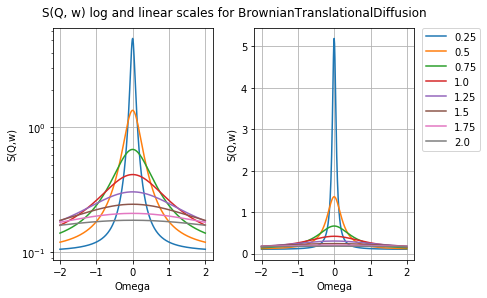

In [17]:
# Resolution    
if resolution_on.value is True:
    sigma = float(sig.value)
    resol = np.exp(-omega**2/(2*sigma**2)) / (sigma*np.sqrt(2*np.pi))
else:
    resol = None

if model.value == 'BrownianTranslationalDiffusion':
    D = float(raw_input("Value of self-diffusion coefficient (in A^2*meV)? "))
    model_sqw = QENSmodels.sqwBrownianTranslationalDiffusion(omega, q, scale, center, D)
    
elif model.value == 'JumpTranslationalDiffusion':
    D = float(raw_input("Value of self-diffusion coefficient (in A^2*meV)? "))
    resTime = float(raw_input("Residence time between jumps (in meV^-1)? "))
    model_sqw = QENSmodels.sqwJumpTranslationalDiffusion(omega, q, scale, center,
           D, resTime)
           
elif model.value == 'IsotropicRotationalDiffusion':
    R = float(raw_input("Radius of sphere (in A)? "))
    DR = float(raw_input("Value of rotational diffusion coefficient (in meV)? "))
    model_sqw = QENSmodels.sqwIsotropicRotationalDiffusion(omega, q, scale, center,
           R, DR) 

elif model.value == 'WaterTeixeira':
    D = float(raw_input("Value of self-diffusion coefficient (in A^2*meV)? "))
    resTime = float(raw_input("Residence time between jumps (in meV^-1)? "))
    R = float(raw_input("Radius of sphere (in A)? "))
    DR = float(raw_input("Value of rotational diffusion coefficient (in meV)? "))
    model_sqw = QENSmodels.sqwWaterTeixeira(omega, q, scale, center,
           D, resTime, R, DR)
    
if resol is not None:
    sqw = np.asarray([np.convolve(model_sqw[i,:], resol/resol.sum(), mode='same') for i in range(len(q))])
else:
    sqw = model_sqw
    
# Background
if background_on.value is True:
    sqw += float(backgd.value)

    
# Plot
fig = plt.figure(1)


ax1 = fig.add_subplot(121)
for i in range(q.size):
    integral = np.trapz(sqw[i,:], omega)
    print ("Integral S(Q=",q[i],",w) = ", integral)
    ax1.plot(omega, sqw[i,:], label=str(q[i]))
ax1.grid(True)
ax1.set_xlabel('Omega')
ax1.set_ylabel('S(Q,w)')
ax1.set_yscale('log')

ax2 = fig.add_subplot(122)
for i in range(q.size):
    ax2.plot(omega, sqw[i,:], label=str(q[i]))
ax2.grid(True)
ax2.set_xlabel('Omega')
ax2.set_ylabel('S(Q,w)')


plt.tight_layout()
plt.suptitle('S(Q, w) log and linear scales for {model}'.format(model=model.value),x=0.55,y=1.025)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()   